In [33]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [34]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [35]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [36]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [37]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine,reflect=True)

In [38]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [39]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [40]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [41]:
# Find the most recent date in the data set.
first_row=session.query(func.max(Measurement.date)).all()
first_row

[('2017-08-23')]

Query Date:  2016-08-23


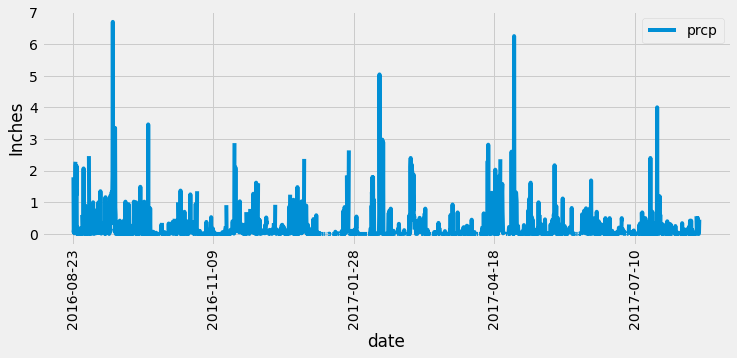

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

query_date= dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

# Starting from the most recent data point in the database. 
recent_data=session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date >= query_date).all()
Measurement_date_df=pd.DataFrame(recent_data)

# Save the query results as a Pandas DataFrame and set the index to the date column
Measurement_date_df=Measurement_date_df.set_index('date')

# Sort the dataframe by date
Date_sorted=Measurement_date_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
Date_sorted.plot(figsize=(11,4))
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.show()


In [43]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Date_sorted.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [44]:
# Design a query to calculate the total number stations in the datase
session.query(Station).first().__dict__
Station_number=session.query(func.count(Station.station)).all()
Station_number

[(9)]

In [45]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Station_number=session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
Station_number

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
session.query(Measurement).first().__dict__
# Station_number=session.query(func.count(Measurement.measurement)).all()

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x14bdac32f88>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0}

In [47]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# session.query(Station).first().__dict__

Station_number=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
Station_number


[(54.0, 85.0, 71.66378066378067)]

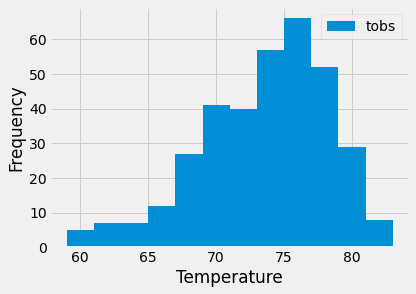

In [50]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Design a query to retrieve the last 12 months of temperature observation data (TOBS).
# Filter by the station with the highest number of observations.
query_date= dt.date(2017,8,23) - dt.timedelta(weeks=52)
active_station=session.query(Measurement.tobs).\
    filter(Measurement.date >= query_date).filter(Measurement.station=='USC00519281').all()

# Plot the results as a histogram with bins=12.
active_station_df=pd.DataFrame(active_station)
active_station_df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")
plt.show()


# Close session

In [49]:
# Close Session
session.close()